In [37]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [38]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [39]:
#The dataset only contains digits 0-9 as labels that represents one of the fashion items as given in the ordered list below
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
#Explore the shape of the training dataset that contains 60k images with 28*28 pixel 2 D array
print('Shape of the train and test dataset: ', train_images.shape, test_images.shape)

Shape of the train and test dataset:  (60000, 28, 28) (10000, 28, 28)


In [41]:
print('Length of Train and Test Labels: ', train_labels.shape, test_labels.shape)

Length of Train and Test Labels:  (60000,) (10000,)


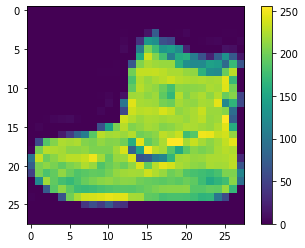

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
#Normalization of train and test data which is scaling all the pixels values bewteen 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

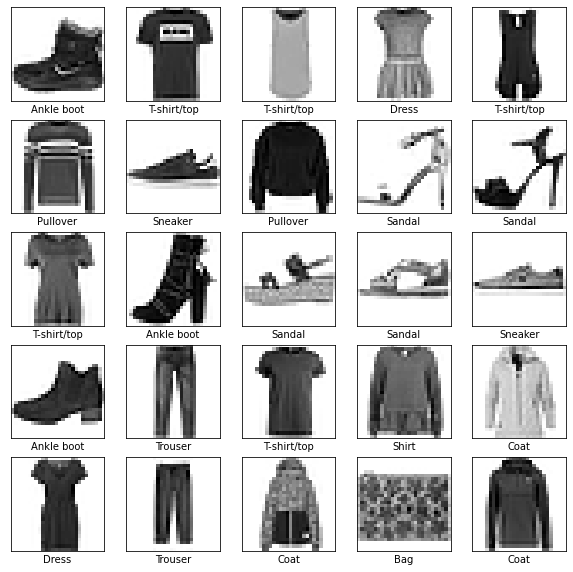

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4974 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [48]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3367 - accuracy: 0.8837

Test accuracy: 0.8837000131607056


In [49]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)

In [51]:
predictions[0]

array([4.2891937e-08, 2.9782035e-08, 4.9741853e-08, 2.3748495e-10,
       4.4207248e-08, 9.8416873e-04, 9.7226813e-09, 7.0331484e-02,
       1.8437506e-05, 9.2866564e-01], dtype=float32)

In [52]:
np.argmax(predictions[0])

9

In [53]:
test_labels[0]

9

In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [55]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

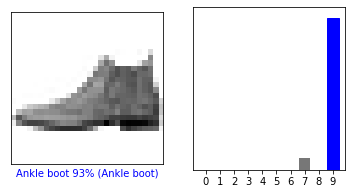

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

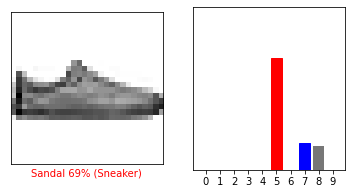

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

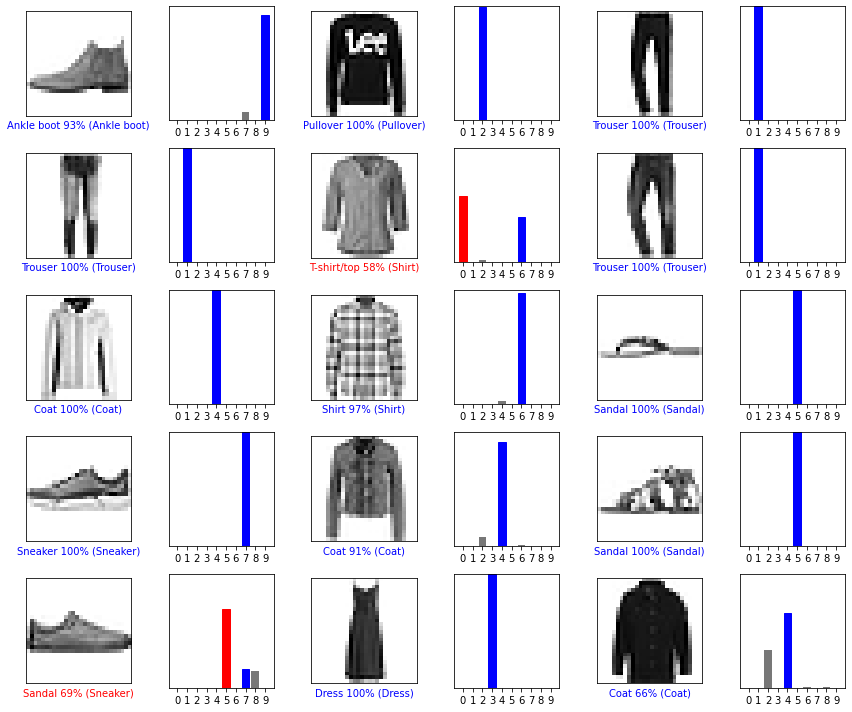

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()